<a href="https://colab.research.google.com/github/huaj1101/tf-learn/blob/master/tutorials/learn-and-use-ml/04_Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [3]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

17465344/17464789 [==============================] - 0s 0us/step


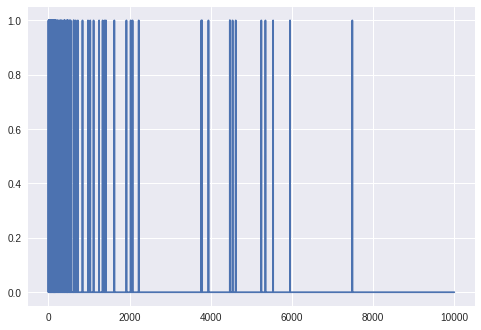

In [4]:
plt.plot(train_data[0])

In [5]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [6]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
 - 5s - loss: 0.4736 - acc: 0.8181 - binary_crossentropy: 0.4736 - val_loss: 0.3399 - val_acc: 0.8730 - val_binary_crossentropy: 0.3399
Epoch 2/20
 - 5s - loss: 0.2533 - acc: 0.9104 - binary_crossentropy: 0.2533 - val_loss: 0.2860 - val_acc: 0.8879 - val_binary_crossentropy: 0.2860
Epoch 3/20
 - 5s - loss: 0.1878 - acc: 0.9330 - binary_crossentropy: 0.1878 - val_loss: 0.2875 - val_acc: 0.8858 - val_binary_crossentropy: 0.2875
Epoch 4/20
 - 5s - loss: 0.1527 - acc: 0.9463 - binary_crossentropy: 0.1527 - val_loss: 0.3115 - val_acc: 0.8784 - val_binary_crossentropy: 0.3115
Epoch 5/20
 - 5s - loss: 0.1265 - acc: 0.9572 - binary_crossentropy: 0.1265 - val_loss: 0.3297 - val_acc: 0.8766 - val_binary_crossentropy: 0.3297
Epoch 6/20
 - 5s - loss: 0.1063 - acc: 0.9667 - binary_crossentropy: 0.1063 - val_loss: 0.3587 - val_acc: 0.8732 - val_binary_crossentropy: 0.3587
Epoch 7/20
 - 5s - l

In [7]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [8]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.5206 - acc: 0.7880 - binary_crossentropy: 0.5206 - val_loss: 0.4082 - val_acc: 0.8596 - val_binary_crossentropy: 0.4082
Epoch 2/20
 - 4s - loss: 0.3207 - acc: 0.8926 - binary_crossentropy: 0.3207 - val_loss: 0.3230 - val_acc: 0.8800 - val_binary_crossentropy: 0.3230
Epoch 3/20
 - 4s - loss: 0.2459 - acc: 0.9174 - binary_crossentropy: 0.2459 - val_loss: 0.2948 - val_acc: 0.8849 - val_binary_crossentropy: 0.2948
Epoch 4/20
 - 4s - loss: 0.2040 - acc: 0.9314 - binary_crossentropy: 0.2040 - val_loss: 0.2857 - val_acc: 0.8863 - val_binary_crossentropy: 0.2857
Epoch 5/20
 - 4s - loss: 0.1758 - acc: 0.9406 - binary_crossentropy: 0.1758 - val_loss: 0.2861 - val_acc: 0.8856 - val_binary_crossentropy: 0.2861
Epoch 6/20
 - 4s - loss: 0.1552 - acc: 0.9491 - binary_crossentropy: 0.1552 - val_loss: 0.2936 - val_acc: 0.8824 - val_binary_crossentropy: 0.2936
Epoch 7/20
 - 4s - loss: 0.1375 - acc: 0.9557 - binary_crossentropy:

In [9]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [10]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 21s - loss: 0.3543 - acc: 0.8492 - binary_crossentropy: 0.3543 - val_loss: 0.3154 - val_acc: 0.8700 - val_binary_crossentropy: 0.3154
Epoch 2/20
 - 21s - loss: 0.1483 - acc: 0.9459 - binary_crossentropy: 0.1483 - val_loss: 0.3298 - val_acc: 0.8741 - val_binary_crossentropy: 0.3298
Epoch 3/20
 - 21s - loss: 0.0504 - acc: 0.9854 - binary_crossentropy: 0.0504 - val_loss: 0.4429 - val_acc: 0.8690 - val_binary_crossentropy: 0.4429
Epoch 4/20
 - 21s - loss: 0.0072 - acc: 0.9988 - binary_crossentropy: 0.0072 - val_loss: 0.5735 - val_acc: 0.8687 - val_binary_crossentropy: 0.5735
Epoch 5/20
 - 20s - loss: 8.1504e-04 - acc: 1.0000 - binary_crossentropy: 8.1504e-04 - val_loss: 0.6720 - val_acc: 0.8692 - val_binary_crossentropy: 0.6720
Epoch 6/20
 - 20s - loss: 2.4047e-04 - acc: 1.0000 - binary_crossentropy: 2.4047e-04 - val_loss: 0.7096 - val_acc: 0.8707 - val_binary_crossentropy: 0.7096
Epoch 7/20
 - 20s - loss: 1.4971e-04 - acc: 1.

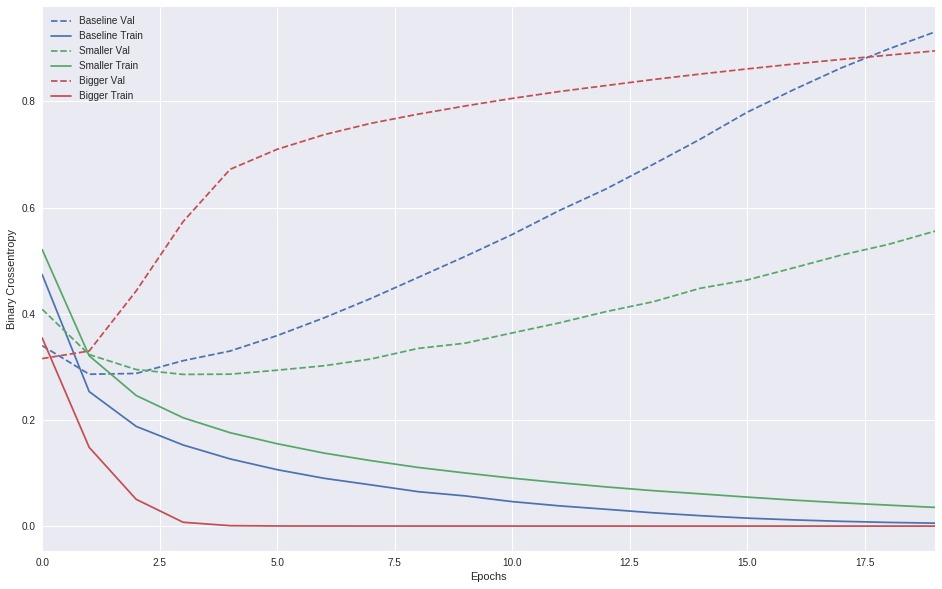

In [11]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])

plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [12]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.4898 - acc: 0.8138 - binary_crossentropy: 0.4458 - val_loss: 0.3573 - val_acc: 0.8813 - val_binary_crossentropy: 0.3108
Epoch 2/20
 - 5s - loss: 0.2833 - acc: 0.9149 - binary_crossentropy: 0.2340 - val_loss: 0.3352 - val_acc: 0.8860 - val_binary_crossentropy: 0.2838
Epoch 3/20
 - 5s - loss: 0.2368 - acc: 0.9358 - binary_crossentropy: 0.1835 - val_loss: 0.3465 - val_acc: 0.8825 - val_binary_crossentropy: 0.2918
Epoch 4/20
 - 5s - loss: 0.2180 - acc: 0.9435 - binary_crossentropy: 0.1615 - val_loss: 0.3707 - val_acc: 0.8758 - val_binary_crossentropy: 0.3129
Epoch 5/20
 - 5s - loss: 0.2017 - acc: 0.9521 - binary_crossentropy: 0.1429 - val_loss: 0.3792 - val_acc: 0.8754 - val_binary_crossentropy: 0.3196
Epoch 6/20
 - 5s - loss: 0.1900 - acc: 0.9578 - binary_crossentropy: 0.1295 - val_loss: 0.3939 - val_acc: 0.8729 - val_binary_crossentropy: 0.3328
Epoch 7/20
 - 5s - loss: 0.1830 - acc: 0.9601 - binary_crossentropy:

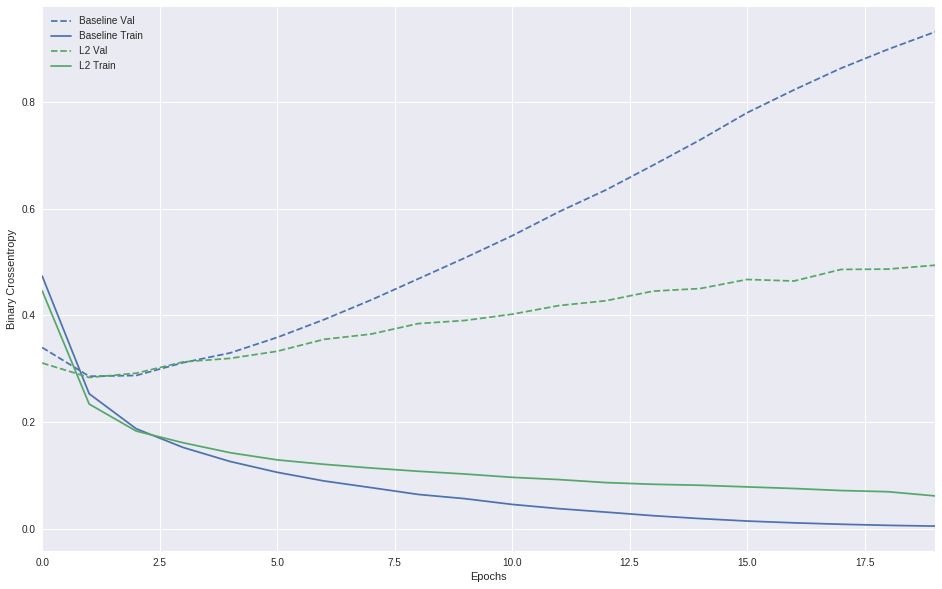

In [13]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [14]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.6176 - acc: 0.6519 - binary_crossentropy: 0.6176 - val_loss: 0.4593 - val_acc: 0.8539 - val_binary_crossentropy: 0.4593
Epoch 2/20
 - 5s - loss: 0.4333 - acc: 0.8147 - binary_crossentropy: 0.4333 - val_loss: 0.3205 - val_acc: 0.8809 - val_binary_crossentropy: 0.3205
Epoch 3/20
 - 5s - loss: 0.3367 - acc: 0.8721 - binary_crossentropy: 0.3367 - val_loss: 0.2867 - val_acc: 0.8856 - val_binary_crossentropy: 0.2867
Epoch 4/20
 - 5s - loss: 0.2747 - acc: 0.9051 - binary_crossentropy: 0.2747 - val_loss: 0.2754 - val_acc: 0.8880 - val_binary_crossentropy: 0.2754
Epoch 5/20
 - 5s - loss: 0.2325 - acc: 0.9190 - binary_crossentropy: 0.2325 - val_loss: 0.2832 - val_acc: 0.8876 - val_binary_crossentropy: 0.2832
Epoch 6/20
 - 5s - loss: 0.2015 - acc: 0.9309 - binary_crossentropy: 0.2015 - val_loss: 0.2970 - val

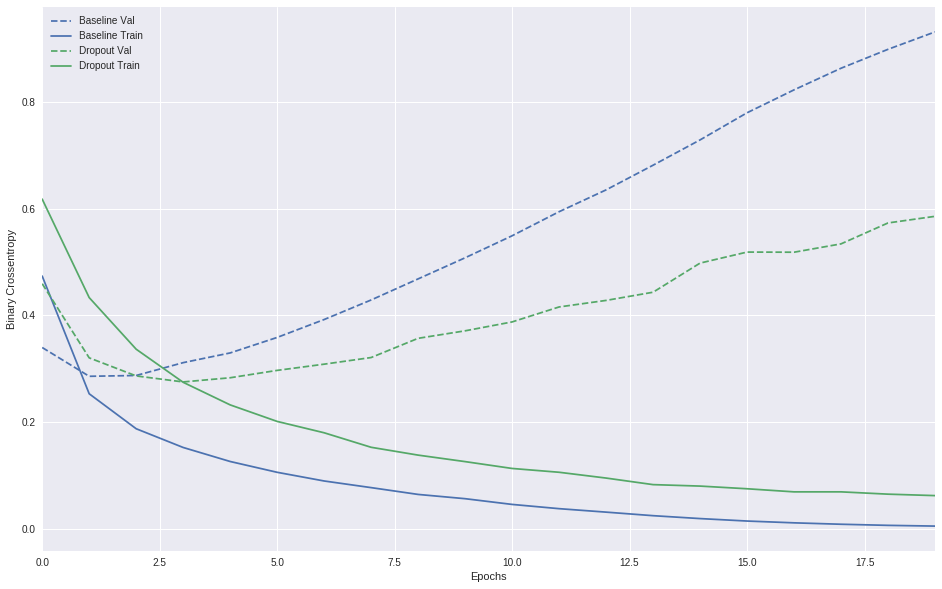

In [15]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])